# Trading Players, Player Performance, and Prediction of Success in Making it to the NBA Finals

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Alexis Garduno
- James Daza
- Jamie Wei
- Aleksander Archipov

<a id='research_question'></a>
# Research Question

- Does the number of times a player is traded predict that player's performance (e.g. average total points scored/game, average minutes played/game, etc) in an NBA game? 
- Also, does the turn-over rate (e.g. number of players traded within a team/season) of a NBA team affect the likelihood that the team will reach the NBA finals (evidenced by the last 20 years of NBA games)?

<a id='background'></a>

## Background & Prior Work

#### Background

The NBA is a high-tension business, where is each team is constantly fighting to maintain only the highest skilled players.  While the top 25 big hitters tend to remain relatively static, the rest of the 450+ players in the league can come and go at any moment.  This can have a great impact on the team and the players.  Trades in the NBA are quite complex, dealing with variables such as salary cap, the NBA collective bargaining agreement(CBA), as well as the team's personal needs.  Some research has already been done on the effects of trades on NBA teams as well as work on predicting factors in NBA player and team success.   

The NBA is also a very stat-heavy sport. NBA games are decided by whichever team has the most points. However, that doesn’t mean Basketball is just about outsourcing your opponent. There are many other factors that are looked upon. Mainly: assists, rebounds, blocks, steals, and turnovers. Each of these variables could be a factor in increasing the points of a team. Assists count when an NBA player passes the ball to another player and that player manages to score some points. A rebound is when another player attempts a shot, and the player catches the ball as it's falling down. A block is when a player manages to deflect a player's shot from his goal. A steal is when a player manages to gain possession from the other team. Finally, a turnover is when a player loses control of the ball, and the opposing team gains possession. Obviously, it is better to have higher stats in all of the mentioned above except turnovers. In this study, we will be looking at these stats and many others to determine how a player is performing in a season. 

#### Prior Work

In a 2020 article by Michael C. Wright (Reference 1), Wright talks to players about the effect that trades can have on the team's morale.  Players mentioned how close wins and tough losses throughout a season can create strong bonds and chemistry between players.  Teams with good chemistry are generally more successful and thus make it closer to the Finals.  The NBA veterans note that it is something they can get used to.  For instance, early in their career, it can have a big impact on how they play, but as they get older they realize it is just a part of the business and it does not affect them as much.  Even still, players that might play together for 5 or more years can easily be separated at any time.  

Work on predicting NBA results has been done before.  The website fivethirtyeight.com (Reference 2) uses player projections that take into account factors, such as physiological, scoring, tendencies, passing, and defense, among other variables.  This data is compared to past NBA players to predict that player's season.  The site then runs simulations on this data to form predicted season statistics for each team.  While this is a reasonable predictor, it fails to take into consideration any phycological factors that can arise from trading, as mentioned previously.

Another source we looked at (Reference 3) found the most important stats when looking at team performances. Generally, a lot of team performance can’t be calculated into a number, however, this website managed to find a correlation between some stats and the likelihood of winning. They specifically looked at Rebounds, Turnovers, Field goal %, Free throw %, and Fouls. They found that the team with the higher Field goal % is 75% more likely to win the game and that the team with the highest Free throw % is 70% more likely to win. However, just because these stats may be higher for some teams, it doesn't always mean they will win the game.

References (include links):
- 1) https://www.nba.com/news/trade-deadline-when-friends-are-dealt
- 2) https://projects.fivethirtyeight.com/nba-trades-2022/
- 3) https://www.oskeimsportspicks.com/nba-stats/#:~:text=In%20addition%20to%20winning%20three%20of%[…]so%20why%20put%20them%20first%20on%20the%20list%3F

# Hypothesis


We expect that an NBA player who is traded more than an average NBA player at their point of their career (in terms of years in the NBA) will score less points/game, play less time/game, and have worse performance on average. Teams with NBA players who are traded more than an average player at a similar point in their career will be less likely to make it to the NBA finals.

# Dataset(s)

#### Source Name: NBA_API
- Link to the dataset: https://github.com/swar/nba_api
- Number of observations: N/A
- API Client that allows access to various NBA's stats API endpoints

#### Source Name: NBA Stats
- Link to the dataset: https://www.nba.com/stats/
- Player stats from 10 random teams ranging from 2016-2021

We began with two sources, primarily relying on the NBA_API to construct datastreams. We performed some simple quality checks to ensure that the dataset we pulled from the NBA_API was consistent with the data shown on the NBA stats site.

##### Dataset Columns from the NBA_API

- **Points Per Game (PTS)**: the amount of points a player scores per games that they play
- **Assists Per Game (AST)**: the amount of times a player pass the ball to a teammate and they score
- **Offensive Rebounds Per Game (OREB)***: the amount of times a player obtains the ball off a miss on offensive.
- **Defensive Rebounds Per Game (DREB)***: the amount of times a player obtains the ball off a miss on offensive.
- **Steals Per Game (STL)**: the amount of times a player obtains the ball from the opponent. Either by intercepting the pass or hitting the ball out of their opponenets hands.
- **Blocks Per Game (BLK)**: the amount of times a player manges to stop the ball after their opponent attempts a shot
- **Field Goal Percentage (FG_PCT)**: the amount of times a player makes the ball vs how many they attempt
- **Free Throw Percentage (FT_PCT)**: the amount of times a player makes the ball in freethrow vs how many they attempt
- **Field Goals Made (FMG)**: the amount of goals a player hits in the game
- **Three Pointers Made (FG3_PCT)**: the amount of times a player scores a basket outside of the three pointer line

#### Dataset: PlayerStats Team Ranking 
- ***Description:*** This dataset contains a player's performance for an individual season; each row is uniquely defined for a player's performance for that team in an individual season. Each player's stat will be averaged per game. If players were traded in the middle of the season, there would be two rows per player. This dataset also contains information about how often players were traded in a given season. This dataset was merged to team performance statistics, largely team rankings over an individual season. This dataset has a header of "working dataset."
- ***Observations:*** 2,892 players per season

##### Dataset Columns from PlayerStats Team Ranking

***If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.***

# Setup

In [38]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings(action='once')

#background
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats

#graphics packages
import matplotlib.pyplot as plt
#statistical analysis
from scipy.stats import rankdata
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

### Gathering Teams

In [10]:
#Import the roster of teams from the NBA API
from nba_api.stats.static import teams

nba_teams = teams.get_teams()

In [11]:
#Obtain a full list of all abbreviations - will need abbreviations to identify team statistics
nba_teams_df=pd.DataFrame(nba_teams)
team_id=nba_teams_df['id'] #this is the unique team id
team_id_random=np.random.choice(team_id,10,replace=False) #identify ten team ids
nba_teams_rdf=nba_teams_df[nba_teams_df['id'].isin(team_id_random)] #df of 10 randomly selected teams
nba_teams_rdf

,id,full_name,abbreviation,nickname,city,state,year_founded
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948
16,1610612753,Orlando Magic,ORL,Magic,Orlando,Florida,1989
18,1610612755,Philadelphia 76ers,PHI,76ers,Philadelphia,Pennsylvania,1949
20,1610612757,Portland Trail Blazers,POR,Trail Blazers,Portland,Oregon,1970
21,1610612758,Sacramento Kings,SAC,Kings,Sacramento,California,1948
23,1610612760,Oklahoma City Thunder,OKC,Thunder,Oklahoma City,Oklahoma,1967
25,1610612762,Utah Jazz,UTA,Jazz,Utah,Utah,1974
28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948


### Requesting Games
Now we request the games for all of the ten teams we have selected

In [12]:
#Pull all games for all ten teams

#Documentation for this endpoint: 
#https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/leaguegamefinder.md
from nba_api.stats.endpoints import leaguegamefinder

# Query for games from the League Game Finder
gamefinder=pd.DataFrame()
for i in team_id_random:
    time.sleep(1) #delay to prevent being blocked from the API
    df = leaguegamefinder.LeagueGameFinder(team_id_nullable=[i]).get_data_frames()[0] #parameter of team ids given
    gamefinder = pd.concat([df,gamefinder])

In [13]:
#Game Statistics

#One row corresponds to one game and one team.
#There will be two rows per game, since there are two teams that played each other.
#Will need to exclude duplicate rows (XXXX will remove duplicate rows)
print(list(set(gamefinder.TEAM_ID))) #confirmed that identified 10 different teams
print(gamefinder.shape) #31,386 games

##Game Finder Dataset: This dataset will be used as the outcome when we look at the association between 
##the exposure and outcome relationship. 
gamefinder

[1610612740, 1610612742, 1610612747, 1610612753, 1610612755, 1610612757, 1610612758, 1610612760, 1610612762, 1610612765]
(33059, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612757,POR,Portland Trail Blazers,0022100990,2022-03-09,POR @ UTA,L,240,85,...,0.818,9.0,27.0,36,19,4.0,2,9,23,-38.0
1,22021,1610612757,POR,Portland Trail Blazers,0022100971,2022-03-07,POR @ MIN,L,240,81,...,0.737,8.0,34.0,42,11,10.0,5,17,30,-43.0
2,22021,1610612757,POR,Portland Trail Blazers,0022100958,2022-03-05,POR @ MIN,L,238,121,...,0.833,11.0,30.0,41,24,5.0,1,15,23,-14.0
3,22021,1610612757,POR,Portland Trail Blazers,0022100939,2022-03-02,POR @ PHX,L,240,90,...,0.760,5.0,30.0,35,22,10.0,2,18,23,-30.0
4,22021,1610612757,POR,Portland Trail Blazers,0022100918,2022-02-27,POR vs. DEN,L,239,92,...,0.692,11.0,31.0,42,22,12.0,3,15,25,-32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,22002,1610612740,NOH,New Orleans Hornets,0020200077,2002-11-08,NOH vs. GSW,W,240,110,...,0.821,17.0,26.0,43,20,8.0,5,13,20,6.0
1813,22002,1610612740,NOH,New Orleans Hornets,0020200063,2002-11-06,NOH vs. SEA,W,241,86,...,0.600,15.0,30.0,45,24,8.0,3,14,20,2.0
1814,22002,1610612740,NOH,New Orleans Hornets,0020200036,2002-11-02,NOH vs. MIA,W,240,100,...,0.818,14.0,27.0,41,19,9.0,5,8,23,4.4
1815,22002,1610612740,NOH,New Orleans Hornets,0020200025,2002-11-01,NOH @ CHI,L,240,79,...,0.714,14.0,25.0,39,18,11.0,5,14,22,-5.0


Now we request all the player stats from seasons ranging from 2016-2021

In [14]:
#get game ids for the last five years

#for now, let's focus on the last five seasons for ease
from nba_api.stats.endpoints import playergamelogs

#generate a parameter dataframe to define timeframe
#Is this timeframe correct? What is the timeframe that the season normally runs from?
season_parameter_df=pd.DataFrame({'Season':['2016-17','2017-18','2018-19','2019-20','2020-21'], 
                    'Date_From':['9/01/2016','9/01/2017','9/01/2018','9/01/2019','9/01/2020'],
                    'Date_To':['8/31/2017','8/31/2018','8/31/2019','8/31/2020','8/31/2021']})

#will obtain no game ids, without the season_nullable and date_nullable items selected
logsdf=pd.DataFrame()
for i in list(range(1, 5)):
    time.sleep(1)
    season=season_parameter_df.iloc[i][0]
    date_from=season_parameter_df.iloc[i][1]
    date_to=season_parameter_df.iloc[i][2]
    
    logs = pd.DataFrame(playergamelogs.PlayerGameLogs(
        season_nullable = season,
        date_from_nullable = date_from,                                                     
        date_to_nullable = date_to
    ).player_game_logs.get_data_frame())
    logsdf = pd.concat([logs,logsdf])

In [15]:
#unique set of game ids
game_ids = list(set(logsdf['GAME_ID'])) #not sure if we need game_ids
player_ids = pd.DataFrame(list(set(logsdf['PLAYER_ID'])))
print(pd.DataFrame(game_ids).shape) #4599 game ids
print(player_ids.shape) #875 unique players
print(logsdf.shape) #97,655 rows where each row is for each player in each game. 

(4599, 1)
(875, 1)
(97655, 66)


<b>4599 Games <br>
875 Unique Players <br>
97,655 stats of players in each game<b>

All the columns of every player that played in the seasons we selected from the random teams chosen

In [16]:
#preview, likely not use these columns
logsdf.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

# Data Cleaning

### Cleaning Player Logs

In [17]:
# Copy Logs DataFrame and remove TEAM ID's that were not selected
logsDf = logsdf.copy()


# Restrict to the player stats we want
logsDf = logsDf[['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'MIN', 'FG_PCT', 'FT_PCT', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'PLUS_MINUS']]
logsDf

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,MIN,FG_PCT,FT_PCT,PTS,AST,REB,STL,BLK,PLUS_MINUS
0,2020-21,1627827,Dorian Finney-Smith,1610612742,Dallas Mavericks,28.305000,0.667,0.000,15,1,4,0,0,-14
1,2020-21,1629731,Dean Wade,1610612739,Cleveland Cavaliers,35.250000,0.500,0.000,18,3,8,1,0,-25
2,2020-21,1630173,Precious Achiuwa,1610612748,Miami Heat,41.566667,0.625,0.429,23,0,10,2,1,6
3,2020-21,1629640,Keldon Johnson,1610612759,San Antonio Spurs,21.516667,0.500,0.500,9,4,4,1,0,-4
4,2020-21,1628382,Justin Jackson,1610612749,Milwaukee Bucks,32.616667,0.333,0.500,9,1,6,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26102,2017-18,2733,Shaun Livingston,1610612744,Golden State Warriors,18.545000,0.400,1.000,6,5,1,0,0,-8
26103,2017-18,201569,Eric Gordon,1610612745,Houston Rockets,29.383333,0.563,0.750,24,1,1,1,2,16
26104,2017-18,2585,Zaza Pachulia,1610612744,Golden State Warriors,10.233333,1.000,1.000,6,0,3,0,1,8
26105,2017-18,203935,Marcus Smart,1610612738,Boston Celtics,35.050000,0.313,0.667,12,3,9,2,2,-8


### Cleaning boxstats
### Saving Data 
Now we save the data we gathered we requested from the NBA API into csv files

In [18]:
#Saving the Data to a csv file
logsDf.to_csv("logPlayerStats.csv")

# NEED TO RUN BOXSTATS REQUEST BLOCK FIRST
# boxscfinder.to_csv("boxscfinder.csv")

### Manipulating/Plotting CSV File Data

In [19]:
#Need to plot the distributions data using either seaborn or matplotlib

dataDf = pd.read_csv("logPlayerStats.csv")
#dataDf['TIMES_TRADED'] = np.nan
pid_lst = list(player_ids[0])
pid_lst[0]

season = ['2016-17','2017-18','2018-19','2019-20','2020-21']

playerStats = pd.DataFrame()
for pid in pid_lst:
    time.sleep(1)
    career = playercareerstats.PlayerCareerStats(player_id=pid)
    temp = career.get_data_frames()[0]
    temp = temp[temp['SEASON_ID'].isin(season)]
    playerStats = playerStats.append(temp)

In [20]:
season = ['2016-17','2017-18','2018-19','2019-20','2020-21']
for s in season:
    playerStats["Traded " + s] = 0
    
for pid in pid_lst:
    for s in season:
        tempDf = dataDf.loc[(dataDf['PLAYER_ID'] == pid) & (dataDf['SEASON_YEAR'] == s)]
        tempDf = tempDf.reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset=['TEAM_ID'])
        traded = len(tempDf.index)-1
        
        if traded >= 0:
            playerStats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = traded
        else:
            playerStats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = 0

In [21]:
playerStats = playerStats.reset_index(drop=True)
playerStats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
0,1630208,2020-21,00,1610612766,CHA,23.0,18,0,63.0,4,...,0,0,3,7,15,0,0,0,0,0
1,202714,2016-17,00,1610612762,UTA,27.0,55,9,1205.0,170,...,42,3,90,100,430,0,0,1,0,0
2,202714,2017-18,00,1610612753,ORL,28.0,69,3,1365.0,178,...,54,8,89,91,473,0,0,1,0,0
3,202714,2018-19,00,1610612763,MEM,29.0,53,3,1204.0,161,...,45,4,62,81,421,0,0,1,0,0
4,202714,2018-19,00,1610612766,CHA,29.0,4,0,42.0,2,...,2,0,4,3,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,1630203,2020-21,00,1610612766,CHA,24.0,7,0,27.0,8,...,1,0,1,0,18,0,0,0,0,0
3214,1630204,2020-21,00,1610612750,MIN,21.0,2,0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
3215,1630205,2020-21,00,1610612739,CLE,23.0,40,0,499.0,62,...,17,13,23,53,165,0,0,0,0,0
3216,1630206,2020-21,00,1610612746,LAC,20.0,4,1,84.0,14,...,4,0,7,5,35,0,0,0,0,0


In [22]:
playerStats.to_csv("PlayerStats.csv")

In [23]:
playerStats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
0,1630208,2020-21,00,1610612766,CHA,23.0,18,0,63.0,4,...,0,0,3,7,15,0,0,0,0,0
1,202714,2016-17,00,1610612762,UTA,27.0,55,9,1205.0,170,...,42,3,90,100,430,0,0,1,0,0
2,202714,2017-18,00,1610612753,ORL,28.0,69,3,1365.0,178,...,54,8,89,91,473,0,0,1,0,0
3,202714,2018-19,00,1610612763,MEM,29.0,53,3,1204.0,161,...,45,4,62,81,421,0,0,1,0,0
4,202714,2018-19,00,1610612766,CHA,29.0,4,0,42.0,2,...,2,0,4,3,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,1630203,2020-21,00,1610612766,CHA,24.0,7,0,27.0,8,...,1,0,1,0,18,0,0,0,0,0
3214,1630204,2020-21,00,1610612750,MIN,21.0,2,0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
3215,1630205,2020-21,00,1610612739,CLE,23.0,40,0,499.0,62,...,17,13,23,53,165,0,0,0,0,0
3216,1630206,2020-21,00,1610612746,LAC,20.0,4,1,84.0,14,...,4,0,7,5,35,0,0,0,0,0


In [24]:
playerStats[playerStats['PLAYER_ID'] ==1626144 ]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,STL,BLK,TOV,PF,PTS,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21
60,1626144,2016-17,00,1610612743,DEN,21.0,55,41,1406.0,208,...,41,13,123,95,603,0,1,0,0,0
61,1626144,2017-18,00,1610612743,DEN,22.0,42,0,752.0,129,...,21,4,72,47,359,0,1,0,0,0
62,1626144,2017-18,00,1610612752,NYK,22.0,22,14,493.0,75,...,20,7,41,33,194,0,1,0,0,0
63,1626144,2017-18,00,0,TOT,22.0,64,14,1244.0,204,...,41,11,113,80,553,0,1,0,0,0
64,1626144,2018-19,00,1610612752,NYK,23.0,59,42,1607.0,330,...,43,19,140,103,873,0,1,0,0,0
65,1626144,2019-20,00,1610612762,UTA,24.0,54,2,850.0,151,...,24,10,76,72,395,0,1,0,0,0


In [25]:
season_stats = pd.DataFrame()
for pid in pid_lst:
    time.sleep(1)
    career = playercareerstats.PlayerCareerStats(player_id=pid)
    temp = career.career_totals_regular_season.get_data_frame()
    season_stats = season_stats.append(temp)  

In [26]:
season_stats

,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630208,00,0,62,5,411.0,60,92,0.652173,0,...,0.685185,34,58,92,15,9,19,24,56,157
0,202714,00,0,456,56,8393.0,1165,2752,0.423328,302,...,0.731462,118,776,894,1421,300,24,560,568,2997
0,1630210,00,0,63,1,347.0,68,183,0.371584,41,...,0.833333,1,27,28,24,11,1,24,34,197
0,1630211,00,0,10,0,88.0,3,13,0.230769,1,...,0.800000,1,13,14,4,0,2,3,10,11
0,1630214,00,0,101,12,1608.0,239,457,0.522975,30,...,0.643564,121,253,374,115,85,47,72,167,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1630203,00,0,7,0,27.0,8,12,0.666666,2,...,0.000000,0,1,1,3,1,0,1,0,18
0,1630204,00,0,2,0,4.0,0,0,0.000000,0,...,0.000000,0,0,0,0,0,0,1,0,0
0,1630205,00,0,87,8,1165.0,156,337,0.462908,17,...,0.690721,54,144,198,53,37,24,50,121,396
0,1630206,00,0,22,1,206.0,32,82,0.390243,8,...,0.800000,4,26,30,9,8,3,14,14,84


In [27]:
season = ['2016-17','2017-18','2018-19','2019-20','2020-21']
for s in season:
    season_stats["Traded " + s] = 0
    
for pid in pid_lst:
    for s in season:
        tempDf = dataDf.loc[(dataDf['PLAYER_ID'] == pid) & (dataDf['SEASON_YEAR'] == s)]
        tempDf = tempDf.reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset=['TEAM_ID'])
        traded = len(tempDf.index)-1
        
        if traded >= 0:
            season_stats.loc[(season_stats['PLAYER_ID'] == pid), ["Traded " + s]] = traded

        else:
            season_stats.loc[(playerStats['PLAYER_ID'] == pid), ["Traded " + s]] = 0

In [28]:
season_stats.to_csv("careerStats_v2.csv")

# Data Analysis & Results

****Include cells that describe the steps in your data analysis.****

# Dataset

### Gathering Teams
This dataset shows the team roster and will be used as the key to merge the team standings over a season with player-level performance statistics. This dataset serves as a key or linker file between datasets.

In [30]:
#Import the roster of teams from the NBA API
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
#Obtain a full list of all abbreviations - will need abbreviations to identify team statistics
nba_teams_df=pd.DataFrame(nba_teams)
nba_teams_df.head(10)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


### PlayersStats Import (Data)

PlayerStats dataset is shown below, where each row correponds to a player's performance on a given team in an individual season. Since we are looking at the number of players who were traded in a given season, we calculated the number of times that player was traded in a given season. There will be two rows for an individual for an individual season if they were traded teams mid-season.

In [31]:
dataDf = pd.read_csv("PlayerStats.csv")
print(dataDf.shape) #total number of observations
dataDf=dataDf.merge(nba_teams_df, left_on='TEAM_ID', right_on='id')

#change variables in terms of average performance over the game
game_stats= ['MIN', 'PTS', 'FGM', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK']

dataDf=dataDf.assign(MIN=dataDf.get('MIN')/dataDf.get('GP'))
dataDf=dataDf.assign(PTS=dataDf.get('PTS')/dataDf.get('GP'))
dataDf=dataDf.assign(FGM=dataDf.get('FGM')/dataDf.get('GP'))
dataDf=dataDf.assign(FG_PCT=dataDf.get('FG_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(FG3_PCT=dataDf.get('FG3_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(FT_PCT=dataDf.get('FT_PCT')/dataDf.get('GP'))
dataDf=dataDf.assign(OREB=dataDf.get('OREB')/dataDf.get('GP'))
dataDf=dataDf.assign(DREB=dataDf.get('DREB')/dataDf.get('GP'))
dataDf=dataDf.assign(AST=dataDf.get('AST')/dataDf.get('GP'))
dataDf=dataDf.assign(STL=dataDf.get('STL')/dataDf.get('GP'))
dataDf=dataDf.assign(BLK=dataDf.get('BLK')/dataDf.get('GP'))

dataDf = dataDf.drop(columns=['Unnamed: 0','id'])
print(dataDf.shape) #QA check (group ids dropped that were not in original roster)
print(list(set(dataDf.get('nickname')))) #names in dataset
dataDf.head(10)

(3218, 33)
(2892, 38)
['Hawks', 'Celtics', 'Pelicans', 'Suns', 'Trail Blazers', 'Kings', 'Rockets', 'Wizards', 'Clippers', 'Thunder', 'Timberwolves', 'Nuggets', 'Heat', 'Bucks', 'Mavericks', 'Cavaliers', 'Nets', 'Magic', 'Pistons', 'Lakers', 'Raptors', 'Spurs', 'Bulls', 'Grizzlies', '76ers', 'Warriors', 'Jazz', 'Knicks', 'Hornets', 'Pacers']


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,full_name,abbreviation,nickname,city,state,year_founded
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,0,1,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
5,1630268,2020-21,0,1610612766,CHA,22.0,7,0,3.714286,0.285714,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
6,1626179,2019-20,0,1610612766,CHA,26.0,63,63,34.365079,6.317460,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
7,1626179,2020-21,0,1610612766,CHA,27.0,69,69,34.536232,7.391304,...,0,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
8,1626174,2016-17,0,1610612766,CHA,21.0,13,0,8.230769,0.923077,...,0,1,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
9,1626195,2017-18,0,1610612766,CHA,24.0,22,1,11.909091,1.909091,...,1,0,0,0,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988


### Import Ranking Data Reflecting Overall Team Performance (Data)

In [32]:
#import the NBA team ranks to reflect overall performance
NBA_team_rank=pd.read_csv("NBAstanding.csv")

#retired code from prior data checkpoint

#dictionary to facilitate merging the player-level information with team ranking information
# team_dict = {'76ers':'Philadelphia 76ers','Kings': 'Sacramento Kings',
#              'Minnesota Timberwolves':'	Timberwolves','Suns':'Phoenix Suns',
#              'Bucks': 'Milwaukee Bucks','Celtics':'Boston Celtics',
#              'Bulls':'Chicago Bulls','Warriors':'Golden State Warriors','Magic':'Orlando Magic',
#              'Spurs':'San Antonio Spurs'}
#replace values for roster with key
#NBA_team_rank.replace({"Team_Name": team_dict},inplace=True)
#restrict to teams listed in the roster
#NBA_team_rank=NBA_team_rank[NBA_team_rank['Team_Name'].isin(list(set(dataDf.get('TEAM_NAME'))))]
NBA_team_rank.head(10)

,Team_Name,Wins_2022,PCT_2022,Wins_2021,PCT_2021,Wins_2020,PCT_2020,Wins_2019,PCT_2019,Wins_2018,...,Wins_2017,PCT_2017,Wins_2016,PCT_2016,Wins_2015,PCT_2015,Wins_2014,PCT_2014,Wins_2013,PCT_2013
0,Heat,38.0,64.0,40.0,56.0,44.0,60.0,39.0,47.0,44.0,...,41.0,50.0,48.0,59.0,37.0,45.0,54.0,66.0,66.0,80.0
1,Bulls,38.0,64.0,31.0,43.0,22.0,34.0,22.0,27.0,44.0,...,41.0,50.0,42.0,51.0,50.0,61.0,48.0,59.0,45.0,55.0
2,76ers,35.0,60.0,49.0,68.0,43.0,59.0,51.0,62.0,52.0,...,28.0,34.0,10.0,12.0,18.0,22.0,19.0,23.0,34.0,42.0
3,Cavaliers,35.0,60.0,22.0,30.0,19.0,29.0,19.0,23.0,50.0,...,51.0,62.0,57.0,70.0,53.0,65.0,33.0,40.0,24.0,29.0
4,Bucks,36.0,60.0,46.0,64.0,56.0,76.0,60.0,73.0,44.0,...,42.0,51.0,33.0,40.0,41.0,50.0,15.0,18.0,38.0,46.0
5,Celtics,34.0,57.0,36.0,50.0,48.0,66.0,49.0,60.0,55.0,...,53.0,65.0,48.0,59.0,40.0,49.0,25.0,30.0,41.0,51.0
6,Raptors,32.0,56.0,27.0,37.0,53.0,74.0,58.0,70.0,59.0,...,51.0,62.0,56.0,68.0,49.0,60.0,48.0,59.0,34.0,42.0
7,Nets,31.0,53.0,48.0,66.0,35.0,49.0,42.0,51.0,28.0,...,20.0,24.0,21.0,26.0,38.0,46.0,44.0,54.0,49.0,60.0
8,Hawks,28.0,48.0,41.0,57.0,20.0,30.0,29.0,35.0,24.0,...,43.0,52.0,48.0,59.0,60.0,73.0,38.0,46.0,44.0,54.0
9,Hornets,29.0,48.0,33.0,45.0,23.0,35.0,39.0,48.0,36.0,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0


### PlayerStats-TeamRanking Merge: Working Dataset (Data)
Description: At this stage, we are merging player statistics with the team ranking information.

In [33]:
#merge the datasets
dataDfm=dataDf.merge(NBA_team_rank, left_on='nickname', right_on='Team_Name')
print(dataDf.shape)
print(dataDfm.shape)
print(dataDfm.columns)
dataDfm

(2892, 38)
(2892, 59)
Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Traded 2016-17', 'Traded 2017-18',
       'Traded 2018-19', 'Traded 2019-20', 'Traded 2020-21', 'full_name',
       'abbreviation', 'nickname', 'city', 'state', 'year_founded',
       'Team_Name', ' Wins_2022', 'PCT_2022', 'Wins_2021', 'PCT_2021',
       'Wins_2020', 'PCT_2020', 'Wins_2019', 'PCT_2019', 'Wins_2018',
       'PCT_2018', 'Wins_2017', 'PCT_2017', 'Wins_2016', 'PCT_2016',
       'Wins_2015', 'PCT_2015', 'Wins_2014', 'PCT_2014', 'Wins_2013',
       'PCT_2013'],
      dtype='object')


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,Wins_2017,PCT_2017,Wins_2016,PCT_2016,Wins_2015,PCT_2015,Wins_2014,PCT_2014,Wins_2013,PCT_2013
0,1630208,2020-21,0,1610612766,CHA,23.0,18,0,3.500000,0.222222,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
1,202714,2018-19,0,1610612766,CHA,29.0,4,0,10.500000,0.500000,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
2,1626163,2016-17,0,1610612766,CHA,24.0,75,16,26.053333,4.266667,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
3,1626163,2017-18,0,1610612766,CHA,25.0,79,4,23.227848,3.886076,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
4,1626163,2018-19,0,1610612766,CHA,26.0,47,0,16.063830,2.936170,...,36.0,44.0,48.0,59.0,33.0,40.0,43.0,52.0,27.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,1627817,2016-17,0,1610612757,POR,22.0,16,0,5.000000,0.812500,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2888,1627834,2017-18,0,1610612757,POR,20.0,1,0,4.000000,1.000000,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2889,1627884,2020-21,0,1610612757,POR,24.0,58,43,22.724138,2.534483,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0
2890,202683,2018-19,0,1610612757,POR,27.0,23,8,22.260870,5.391304,...,41.0,50.0,44.0,54.0,51.0,62.0,54.0,66.0,33.0,40.0


#### Quality Check: Check for Duplicates

In [34]:
#Times traded has duplicated measures of times traded for the team
#Deduplication only has unique information for each team and for each season. 
dataDfm_dedup=dataDfm.drop_duplicates(subset=['TEAM_ID','SEASON_ID','PLAYER_ID'])
dataDfm_dedup.shape

(2892, 59)

## Data Analysis & Results (EDA)

### Exploratory Data Analysis & Visualization


#### Summary Statistics 

***Season Trading Summary***: We are investigating the extent to which a player was traded over an annual basis. There were no evidence of trades in the 2016-2017 season; yet, it appears that every other year, there is an increase in the proportion of players traded in an individual season. On average in a given season, 11% of players were traded in a given season, with a peak in trades every other year. Over the last five years, the 2018-2019 season had the largest proportion of players traded in a given season.

***Team Trading Summary***: On average, 11.4% of players were traded in a season, and on average over the last five seasons, 11.3% of players were traded on average in an individual team. In the 2018-2019 season, the top five teams who traded the largest proportion of players on their team roster was the Knicks (29.7%), followed by Pistons (29.6%), 76ers (29.2%), Suns (27.8%), and the Wizards (27.55%). The teams with the lowest proportion of players traded in the 2018-2019 season were the Hornets (3.7%), Pacers (5.9%), Spurs (6.1%), Nuggets (6.4%), and the Warriors (7.8%).

In [35]:
#Examine the number of times traded per season
trade = ['Traded 2016-17', 'Traded 2017-18',
       'Traded 2018-19', 'Traded 2019-20', 'Traded 2020-21']
trade_sum=dataDfm_dedup.get(trade).mean()
trade_sum2=(sum(trade_sum)/len(trade_sum))
print(trade_sum)
print(trade_sum2)

#Estimate the number of trades per team in a season
team_trade_sum=dataDfm_dedup.groupby(['nickname']).mean().get(trade).reset_index().sort_values('Traded 2018-19',ascending=False)
team_trade_sum=team_trade_sum.assign(TradedMean=team_trade_sum.mean(axis=1)) #average over trades (season)
print(team_trade_sum.get('TradedMean').mean())
team_trade_sum.head(5)
# average_team_trades=dataDfm_dedup.groupby(['TEAM_NAME','SEASON_YEAR']).mean().get('TIMES_TRADED').reset_index()
# average_team_trades.sort_values("TIMES_TRADED",ascending=False)

Traded 2016-17    0.000000
Traded 2017-18    0.112379
Traded 2018-19    0.179115
Traded 2019-20    0.119640
Traded 2020-21    0.160788
dtype: float64
0.11438450899031813
0.11271396413188105


,nickname,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,TradedMean
12,Knicks,0.0,0.127660,0.297872,0.063830,0.159574,0.129787
20,Pistons,0.0,0.163265,0.295918,0.214286,0.193878,0.173469
0,76ers,0.0,0.207547,0.292453,0.122642,0.103774,0.145283
24,Suns,0.0,0.123711,0.278351,0.134021,0.072165,0.121649
29,Wizards,0.0,0.040816,0.275510,0.183673,0.163265,0.132653


In [36]:
team_trade_sum.tail(5)

,nickname,Traded 2016-17,Traded 2017-18,Traded 2018-19,Traded 2019-20,Traded 2020-21,TradedMean
28,Warriors,0.0,0.022222,0.077778,0.155556,0.166667,0.084444
17,Nuggets,0.0,0.063830,0.063830,0.180851,0.180851,0.097872
23,Spurs,0.0,0.048780,0.060976,0.048780,0.085366,0.048780
18,Pacers,0.0,0.059524,0.059524,0.035714,0.142857,0.059524
9,Hornets,0.0,0.073171,0.036585,0.121951,0.012195,0.048780


###  Data Distribution of Player Performance Metrics (Overall)

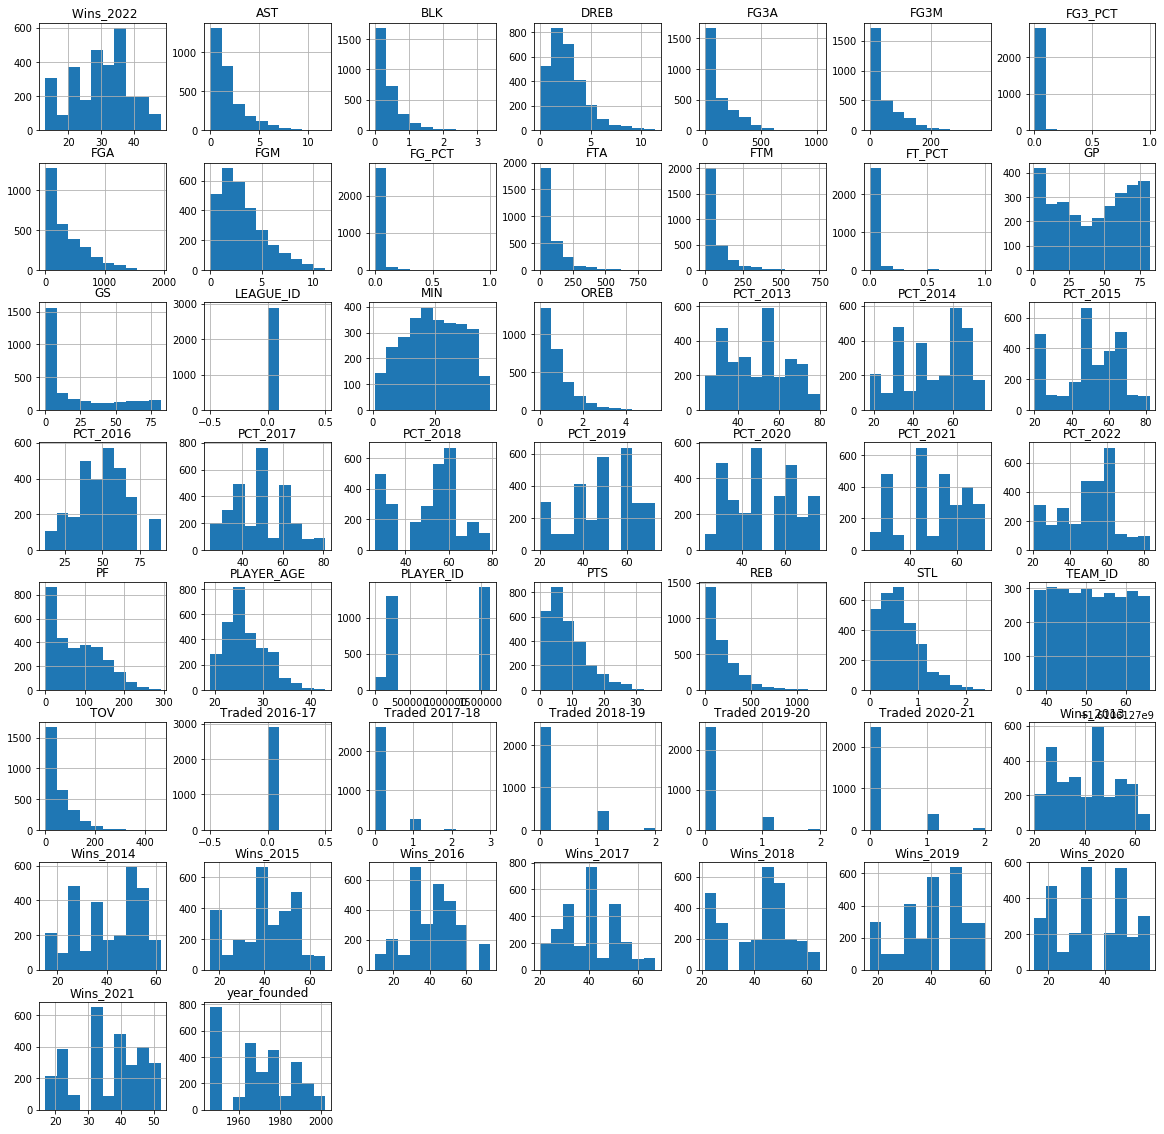

In [39]:
dataDfm.hist(figsize=(20,20))
plt.show()

### Player Distribution of Player Trades Per Team over 5 Seasons

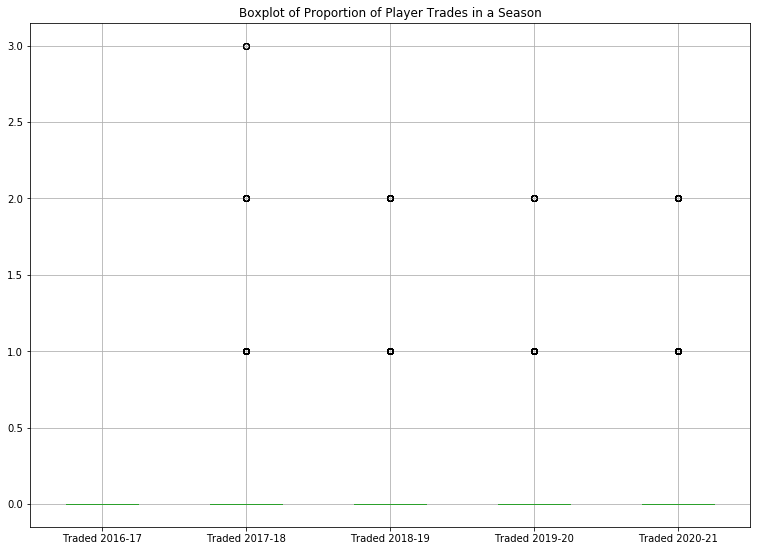

In [40]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = dataDfm.get(trade).boxplot(figsize=(10,10))
plt.title('Boxplot of Proportion of Player Trades in a Season')
# show plot
plt.show()

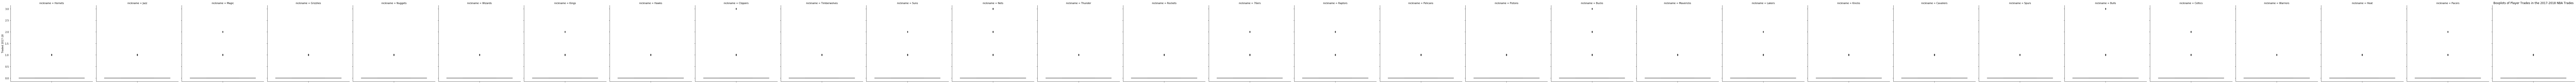

In [41]:
plt2 = sns.catplot(y='Traded 2017-18',
                col="nickname",
                data=dataDfm, kind="box")
plt.title('Boxplots of Player Trades in the 2017-2018 NBA Trades')
plt.show()

#### Dendogram 

This diagram shows hierarchal relationships (ttps://www.displayr.com/what-is-dendrogram/). Note, this is standardized in terms of z-scores. This diagram shows player level characteristics at the indiivdual-level on the left side of the dendogram, and team statistics over the season are shown on the right-side of the dendogram. At this point, the current 2022 season appears to be clustered more closely to 2021, which is the most different from the performance across seasons during the 2018 season.

In [ ]:
%matplotlib notebook
%matplotlib inline
df = dataDfm
df = df.set_index('nickname')
sns.clustermap(df.drop(columns=['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
                                'TEAM_ABBREVIATION','abbreviation', 'city', 'state',
                                'Team_Name','year_founded']).select_dtypes(include= np.number),
              z_score=0) #drop team identifiers, standardize to z-score since on different scales
plt.show()

### Sphaghetti Plots

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter('PCT_2022','Traded 2020-21',data=dataDfm)
plt.show()

### Primary Statistical Analyses 

Description of Statistical Analysis Plan:



# Ethics & Privacy

* ***Ethics:*** One ethical concern is the use of our predictive model of the player and team performance for gambling. If we make this program publically available, it will be important to write disclaimers about the use of this model for gambling, since our model is not optimized for making money. Those who engage in online gambling may attempt to use this model to place bets but that is ill-advised since this analysis is largely exploratory. We don't have any concerns about privacy since this data is publically available and is de-identified. Alternatively, another key consideration is that this model may demonstrate that players that are heavily traded are undesirable, so this research may identify the player as undesirable and may slander the athlete, which could potentially impact the future earnings of NBA players. This analysis may potentially lead particular athletes who are heavily traded to be viewed negatively by the public. 

* ***Privacy:*** Player statistics are generally publicized in the news and are a part of player contracts; they are not protected personal information and cannot be used to identify other private information about individual players. 

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

***Alexis:*** Developed the research hypothesis with team. Developed data cleaning approach with James and Jamie. Contributed to data cleaning (e.g.developed code to pull from NBA_API and how to use information or keys from one dataset to access another dataset, and worked with James to pull from the NBA_API and prepare the dataset for analysis). Conducted exploratory data analysis (summary statistics section in the exploratory data analysis section (summarized trends in trading at the season level), exploratory data analysis (data distributions), player distributions, and dendogram). Designed the statistical analysis plan with James and Jaimie.